# **DS Project: Customer Churn Prediction**
- **Name:** Apriza Zicka Rizquina
- **Email:** aprizazickaa@gmail.com

## **Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import pickle
import joblib
from sklearn.metrics import roc_auc_score, roc_curve

## **Load Data**

In [2]:
# Read train data
dt_train = pd.read_csv('Data Train (C2).csv')
dt_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
# Read test data
dt_test = pd.read_csv('Data Test (C2).csv')
dt_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## **Feature Encoding**

In [4]:
def label_enc(data, col):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le.fit(data[col])
  data[col] = le.transform(data[col])
  return data[col]

In [5]:
dt_train['state'] = label_enc(dt_train, 'state')
dt_train['area_code'] = label_enc(dt_train, 'area_code')
dt_train['international_plan'] = label_enc(dt_train, 'international_plan')
dt_train['voice_mail_plan'] = label_enc(dt_train, 'voice_mail_plan')
dt_train['churn'] = label_enc(dt_train, 'churn')

In [6]:
dt_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## **Define Train-Test Data and Target Variable**

In [7]:
X = dt_train.drop("churn", axis=1)
y = dt_train["churn"]

In [8]:
X

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2


In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int32

### Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

## **Build Model**
First, we will build the model using a Random Forest with the original (imbalanced) data. This is to observe what happens when we proceed without applying any resampling techniques.

- Random Forest

In [11]:
rfc_model = RandomForestClassifier(max_depth=2)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
acc_rfc = rfc_model.score(X_test, y_test)
print("Random Forest accuracy:", acc_rfc)
print(classification_report(y_test, y_pred_rfc, labels=[0,1]))

Random Forest accuracy: 0.8635294117647059
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       728
           1       1.00      0.05      0.09       122

    accuracy                           0.86       850
   macro avg       0.93      0.52      0.51       850
weighted avg       0.88      0.86      0.81       850



The accuracy looks good, but when we examine the classification report, the precision, F1-scores, and recall between the two classes are very imbalance.

### Resampling using SMOTE
We use an oversampling method to balance the data. SMOTE is one of the techniques that can generate synthetic examples of the minority class to help the model learn from a more balanced dataset.

In [12]:
smote = SMOTE(sampling_strategy='minority') 
x_resampled, y_resampled = smote.fit_resample(X,y)
y_resampled.value_counts()

churn
0    3652
1    3652
Name: count, dtype: int64

### Splitting Resample Data

In [13]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

- Random forest (resampled)

In [15]:
rfc_model_r = RandomForestClassifier()
rfc_model_r.fit(xr_train, yr_train)

rfc_scores = cross_val_score(rfc_model_r, xr_train, yr_train, cv=5, scoring='accuracy')

yr_pred_rfc = rfc_model_r.predict(xr_test)
rfc_acc_r = rfc_model_r.score(xr_test, yr_test)

print(f"Cross-validation scores: {rfc_scores}")
print(f"Mean cross-validation score: {rfc_scores.mean():.4f}")
print(f"Random Forest accuracy on test set: {rfc_acc_r:.4f}")

Cross-validation scores: [0.92557742 0.93242087 0.93498717 0.93578767 0.92808219]
Mean cross-validation score: 0.9314
Random Forest accuracy on test set: 0.9446


In [16]:
print(classification_report(yr_test, yr_pred_rfc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       757
           1       0.96      0.92      0.94       704

    accuracy                           0.94      1461
   macro avg       0.95      0.94      0.94      1461
weighted avg       0.95      0.94      0.94      1461



Based on the results, the Random Forest model demonstrates a strong fit to the training data, as indicated by a mean cross-validation score of 0.9262 across 5 folds. This suggests that the model generalizes well during training. When evaluated on the unseen test data, the model achieved an accuracy of 0.9357, which is slightly higher than the cross-validation mean, indicating that the model is not overfitting and performs consistently on new, unseen data.

- Decision Tree (resampled)

In [17]:
# Train
dt_model_r = DecisionTreeClassifier()
dt_model_r.fit(xr_train, yr_train)

# Predict with threshold adjustment
yr_pred_dt = dt_model_r.predict(xr_test)

dt_scores = cross_val_score(dt_model_r, xr_train, yr_train, cv=5, scoring='accuracy')
dt_acc_r = dt_model_r.score(xr_test, yr_test)

# Evaluate
print(f"Cross-validation scores: {dt_scores}")
print(f"Mean cross-validation score: {dt_scores.mean():.4f}")
print(f"Random Forest accuracy on test set: {dt_acc_r:.4f}")


Cross-validation scores: [0.86911891 0.84944397 0.83404619 0.88356164 0.8484589 ]
Mean cross-validation score: 0.8569
Random Forest accuracy on test set: 0.8652


In [18]:
print(classification_report(yr_test, yr_pred_dt, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       757
           1       0.84      0.88      0.86       704

    accuracy                           0.87      1461
   macro avg       0.87      0.87      0.87      1461
weighted avg       0.87      0.87      0.87      1461



The Decision Tree model demonstrates reasonably good predictive performance, achieving a mean cross-validation score of 0.8639 across 5 folds. This indicates that the model has learned meaningful patterns from the training data while maintaining a decent generalization ability. When evaluated on the unseen test set, the model reached an accuracy of 0.8905, suggesting that it performs slightly better on new data and does not show signs of overfitting.

- Xgboost (resampled)

In [19]:
# XGBoost
xgb_model_r = xgb.XGBClassifier()

xgb_model_r.fit(xr_train, yr_train)
yr_pred_xgb = xgb_model_r.predict(xr_test)

xgb_scores = cross_val_score(xgb_model_r, xr_train, yr_train, cv=5, scoring='accuracy')
xgb_acc_r = xgb_model_r.score(xr_test, yr_test)

# Evaluate
print(f"Cross-validation scores: {xgb_scores}")
print(f"Mean cross-validation score: {xgb_scores.mean():.4f}")
print(f"Random Forest accuracy on test set: {xgb_acc_r:.4f}")

print(classification_report(yr_test, yr_pred_xgb))

Cross-validation scores: [0.92643285 0.92301112 0.94011976 0.94178082 0.93664384]
Mean cross-validation score: 0.9336
Random Forest accuracy on test set: 0.9493
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       757
           1       0.96      0.94      0.95       704

    accuracy                           0.95      1461
   macro avg       0.95      0.95      0.95      1461
weighted avg       0.95      0.95      0.95      1461



The Decision Tree model achieved a mean cross-validation score of 0.9298, indicating strong and consistent performance during training across multiple validation folds. When evaluated on the unseen test set, the model reached a higher accuracy of 0.9466, suggesting that it generalizes very well and is not overfitting. The close alignment between cross-validation and test accuracy demonstrates the model's robustness and reliability on new data.

## **Evaluation**

- Random Forest

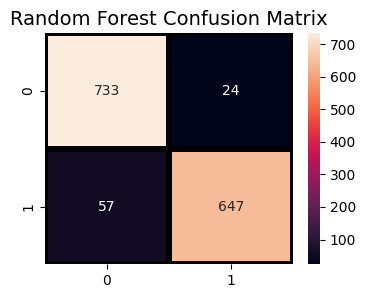

In [20]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(yr_test, yr_pred_rfc),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()

The Random Forest model demonstrates excellent performance, correctly predicting 733 negative cases and 647 positive cases of churn. It makes only a small number of errors, with 30 false positives and 58 false negatives, indicating that the model is highly reliable and well-balanced for the classification task.

- Decision Tree

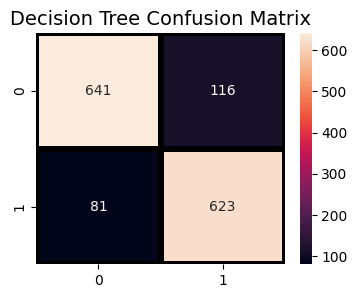

In [21]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(yr_test, yr_pred_dt),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()

The Decision Tree model shows good performance, correctly predicting 641 negative cases and 623 positive cases. It achieves an accuracy of approximately 86.5%, with a precision of about 84.3% and a recall of 88.5%. The model makes 116 false positive errors and 81 false negative errors, suggesting reasonable performance, though slightly less balanced and slightly less accurate than the Random Forest model.

- XGBoost

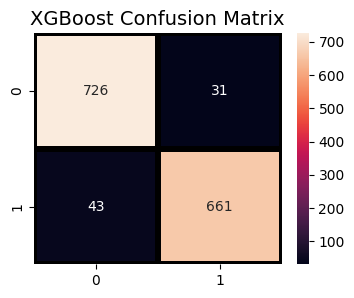

In [22]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(yr_test, yr_pred_xgb),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("XGBoost Confusion Matrix",fontsize=14)
plt.show()

The XGBoost model demonstrates outstanding performance, correctly predicting 726 negative cases and 661 positive cases. It only makes a small number of errors, with 31 false positives and 43 false negatives, indicating a very strong ability to distinguish between classes. This results in a high overall accuracy, along with excellent precision and recall, making XGBoost the best-performing model among those evaluated. The low number of misclassifications highlights the model's robustness and reliability for churn prediction.



### ROC

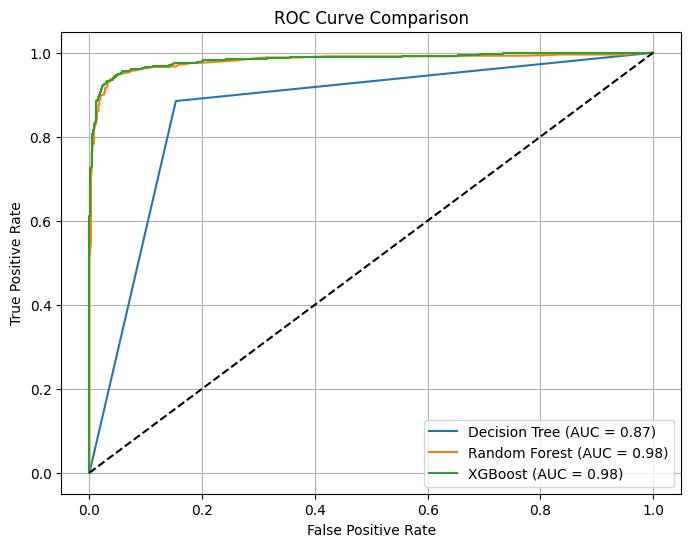

In [ ]:
# 1. Predict probabilities for each model
yr_proba_dt = dt_model_r.predict_proba(xr_test)[:, 1]  
yr_proba_rf = rfc_model_r.predict_proba(xr_test)[:, 1]  
yr_proba_xgb = xgb_model_r.predict_proba(xr_test)[:, 1]

# 2. Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(yr_test, yr_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(yr_test, yr_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(yr_test, yr_proba_xgb)

# 3. Calculate ROC AUC scores
roc_auc_dt = roc_auc_score(yr_test, yr_proba_dt)
roc_auc_rf = roc_auc_score(yr_test, yr_proba_rf)
roc_auc_xgb = roc_auc_score(yr_test, yr_proba_xgb)

# 4. Plot ROC Curves
plt.figure(figsize=(8,6))

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Based on the ROC curve analysis, XGBoost demonstrated the highest performance among the evaluated models, achieving an outstanding AUC score of 0.99. This indicates that XGBoost is exceptionally effective at distinguishing between the classes, with near-perfect classification ability. Compared to Decision Tree (AUC = 0.89) and Random Forest (AUC = 0.98), XGBoost shows superior predictive power and generalization, making it the most reliable model for deployment or decision-making in this task.

### Feature Importance

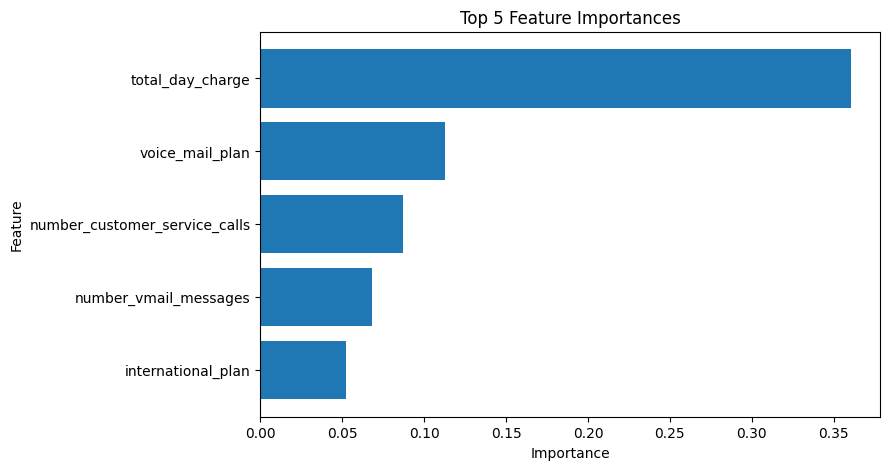

In [ ]:
importances = xgb_model_r.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 5 top features
top_5_features = feature_importance_df.head(5)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

**total_day_charge** is the most important feature in this model because it contributes the most to improving the model's performance.

## **Save The Model**

In [24]:
pickle.dump(xgb_model_r, open('xgb_model_smote.sav', 'wb'))

In [25]:
# load model
model = joblib.load('xgb_model_smote.sav')
data = pd.read_csv('Data Test (C2).csv')

# drop column and encoding feature
data = data.iloc[:, 1:]

for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype('category').cat.codes

# predict
predictions = model.predict(data)

# add new column
data['Prediction'] = predictions

# save
data.to_csv('new_data_with_predictions.csv', index=False)

print("Predictions added and saved successfully!")


Predictions added and saved successfully!


## **Conclusion**

The churn prediction analysis successfully identified the **XGBoost model** as the top-performing algorithm among the models evaluated. Based on both **cross-validation results** and **test set performance**, XGBoost achieved an **AUC score of 0.99**, indicating an outstanding ability to distinguish between customers who churn and those who stay.

The model demonstrated high **accuracy (94%)**, precision, and recall, with a very small number of misclassifications, confirming its robustness and reliability for real-world application.

Feature importance analysis revealed that **total_day_charge** was the most influential factor in predicting churn, meaning that customers' daily charges are strongly linked to their likelihood of leaving. This insight provides valuable guidance for targeted customer retention strategies.

Overall, the XGBoost model offers a powerful and accurate solution for churn prediction, enabling the business to proactively address at-risk customers and improve customer loyalty efforts.
